In [1]:
import joblib

In [7]:
initial_loss = joblib.load('./initial_loss.pkl')

In [10]:
train_losses = []
val_losses = []
for method in ['my', 'constant', 'cosine']:
    history = joblib.load(f'./temp/training_history_{method}.pkl')
    
    temp_train = [initial_loss['train']]
    temp_val = [initial_loss['val']]

    temp_train.extend(history['train_loss'])
    temp_val.extend(history['val_loss'])

    train_losses.append(temp_train)
    val_losses.append(temp_val)

In [18]:
steps = [0]
steps.extend(history['steps'])

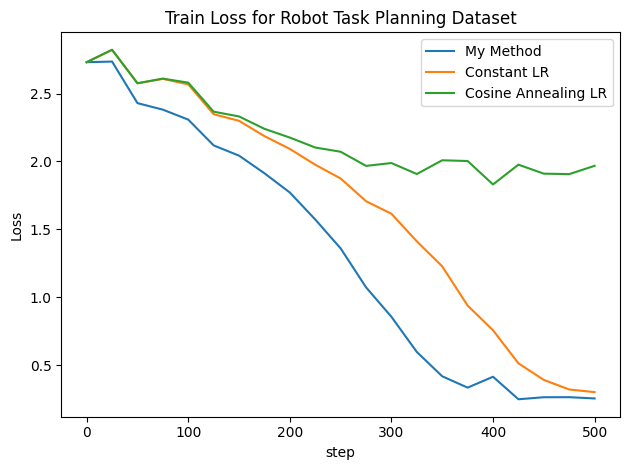

In [30]:
import matplotlib.pyplot as plt
plt.title('Train Loss for Robot Task Planning Dataset')
plt.plot(steps,train_losses[0], label='My Method')
plt.plot(steps,train_losses[1], label='Constant LR')
plt.plot(steps,train_losses[2], label='Cosine Annealing LR')
plt.xlabel('step')
plt.ylabel('Loss')
plt.xticks(ticks=range(0, 501, 100))
plt.legend()
plt.tight_layout()
plt.savefig('./train_loss.png')
plt.show()

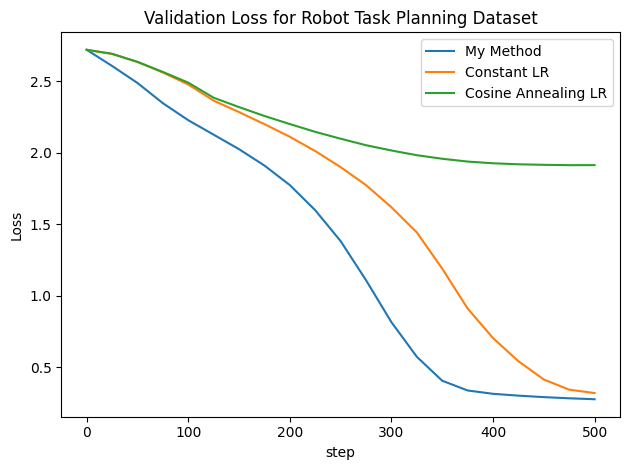

In [29]:
import matplotlib.pyplot as plt
plt.title('Validation Loss for Robot Task Planning Dataset')
plt.plot(steps,val_losses[0], label='My Method')
plt.plot(steps, val_losses[1], label='Constant LR')
plt.plot(steps, val_losses[2], label='Cosine Annealing LR')
plt.xlabel('step')
plt.ylabel('Loss')
plt.xticks(ticks=range(0, 501, 100))
plt.legend()
plt.tight_layout()
plt.savefig('valid_loss.png')
plt.show()